In [5]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))
from synth_dim_model import *

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

In [9]:
N = 2
M = 5
V = -1
dt = 0.01

time_array = [1.25, 1.25, 1.25, 10]
J_V_ratios = [
    [0.1, 10],  # step 1
    [10, 10],   # step 2
    [10, 2],    # step 3
    [2, 0.1]    # step 4
]

mu_V_ratios = [
    [10, 10],  # step 1
    [10, 0],   # step 2
    [0, 0],    # step 3
    [0, 0]     # step 4
]

times, J_V_ratio_routine, mu_V_ratio_routine = make_linear_stepped_routines(J_V_ratios, mu_V_ratios, time_array, dt)

adiabatic_energies, adiabatic_wavefunctions, adiabatic_probabilities, adiabatic_overlaps, true_energies = \
    simulate_adiabatic_evolution(N, M, V, mu_V_ratio_routine, J_V_ratio_routine, times, dt=dt, initial_state=None)

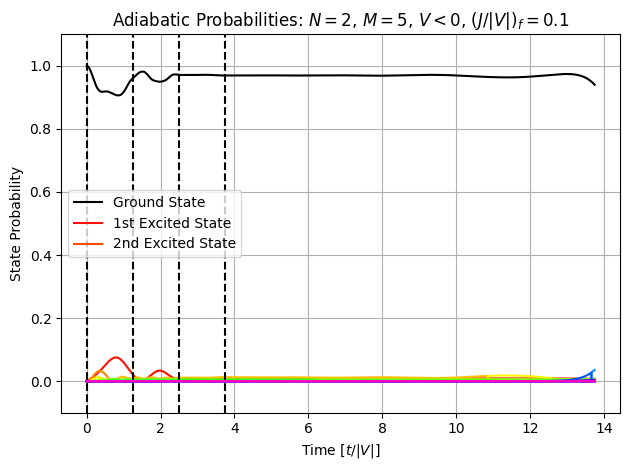

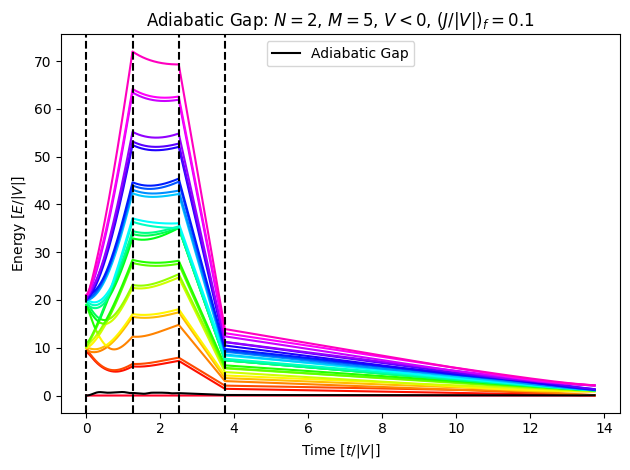

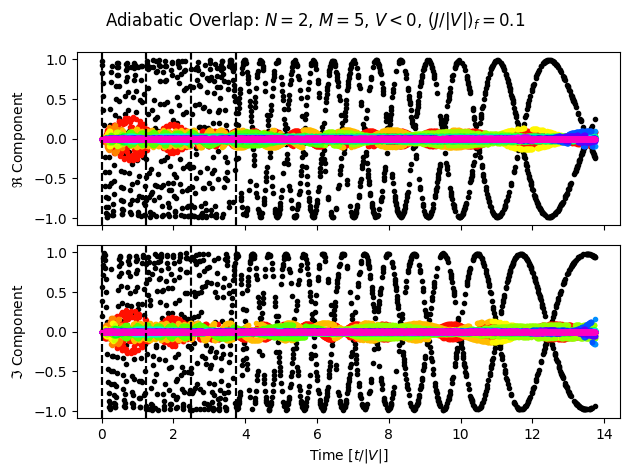

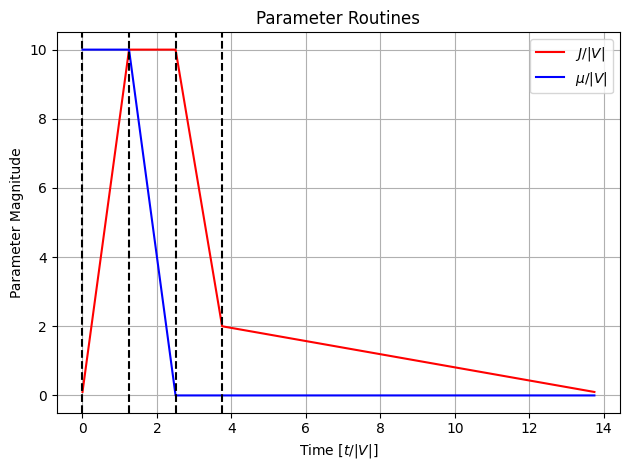

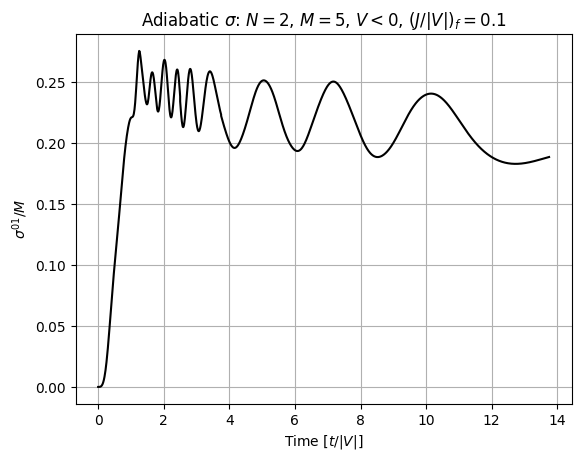

In [10]:
colors = get_cmap("gist_rainbow", M**N)

# --------------------------------------------------------------------------------------------------------------------------------------------
# plot 1: adiabatic probabilities versus time
fig, ax = plt.subplots()
for index in range(M**N):
    if index == 0:
        ax.plot(times, adiabatic_probabilities[:,index], color = "k", label = "Ground State")
    elif index == 1:
        ax.plot(times, adiabatic_probabilities[:,index], color = colors(index), label = "1st Excited State")
    elif index == 2:
        ax.plot(times, adiabatic_probabilities[:,index], color = colors(index), label = "2nd Excited State") 
    else: 
        ax.plot(times, adiabatic_probabilities[:,index], color = colors(index))
ax.set_ylim(-0.1,1.1)
ax.legend(loc = "center left")
ax.set_title(f"Adiabatic Probabilities: $N={N}$, $M={M}$, $V<0$, $(J/|V|)_f = {J_V_ratios[-1][-1]}$")
ax.set_xlabel("Time [$t/|V|$]")
ax.set_ylabel("State Probability")
ax.grid()
fig.tight_layout()

accumulated_time = 0
for time in time_array:
    ax.axvline(accumulated_time, color = "k", linestyle = "--")
    accumulated_time += time
    
# --------------------------------------------------------------------------------------------------------------------------------------------
# plot 2: gap versus time
fig, ax = plt.subplots()
for index in range(M**N):
    ax.plot(times, true_energies[:,index]-true_energies[:,0], color = colors(index))
    
ax.plot(times, adiabatic_energies-true_energies[:,0], color = "k", label = "Adiabatic Gap")
ax.legend(loc = "upper center")
ax.set_title(f"Adiabatic Gap: $N={N}$, $M={M}$, $V<0$, $(J/|V|)_f = {J_V_ratios[-1][-1]}$")
ax.set_xlabel("Time [$t/|V|$]")
ax.set_ylabel("Energy [$E/|V|$]")
fig.tight_layout()


accumulated_time = 0
for time in time_array:
    ax.axvline(accumulated_time, color = "k", linestyle = "--")
    accumulated_time += time

# --------------------------------------------------------------------------------------------------------------------------------------------
# plot 3: real and imaginary components of overlap versus time
fig, (ax1,ax2) = plt.subplots(nrows = 2, sharex=True)

for index in range(M**N):
    if index == 0:
        ax1.plot(times, np.real(adiabatic_overlaps[:,0]), '.', color = "k")
        ax2.plot(times, np.imag(adiabatic_overlaps[:,0]), '.', color = "k")
    else:    
        ax1.plot(times, np.real(adiabatic_overlaps[:,index]), '.', color = colors(index))
        ax2.plot(times, np.imag(adiabatic_overlaps[:,index]), '.', color = colors(index))
        
    ax1.set_ylabel("$\Re$ Component")
    ax2.set_ylabel("$\Im$ Component")
        
ax2.set_xlabel("Time [$t/|V|$]")
fig.suptitle(f"Adiabatic Overlap: $N={N}$, $M={M}$, $V<0$, $(J/|V|)_f = {J_V_ratios[-1][-1]}$")
fig.tight_layout()

accumulated_time = 0
for time in time_array:
    ax1.axvline(accumulated_time, color = "k", linestyle = "--")
    ax2.axvline(accumulated_time, color = "k", linestyle = "--")
    accumulated_time += time
    
# --------------------------------------------------------------------------------------------------------------------------------------------
# plot 4: parameter evolution versus time
fig, ax = plt.subplots()
ax.plot(times, J_V_ratio_routine, 'r', label = "$J/|V|$")
ax.plot(times, mu_V_ratio_routine, "b", label = "$\mu/|V|$")
        
ax.set_title("Parameter Routines")
ax.legend(loc = "upper right")
ax.set_ylabel("Parameter Magnitude")
ax.set_xlabel("Time [$t/|V|$]")
ax.grid()
fig.tight_layout()

accumulated_time = 0
for time in time_array:
    ax.axvline(accumulated_time, color = "k", linestyle = "--")
    accumulated_time += time
    
# --------------------------------------------------------------------------------------------------------------------------------------------    
# plot 5: sigma evolution versus time
fig, ax = plt.subplots()
states, _ = enumerate_states(N, M)
sigmas = []
for wavefunction in adiabatic_wavefunctions:
    sigmas += [sigma_ij(0, 1, ground_state_wavefunction = wavefunction, states = states, N=N, M=M)/M]
ax.plot(times, sigmas, "-k")

ax.set_title(f"Adiabatic $\sigma$: $N={N}$, $M={M}$, $V<0$, $(J/|V|)_f = {J_V_ratios[-1][-1]}$")
ax.set_ylabel("$\sigma^{01}/M$")
ax.set_xlabel("Time [$t/|V|$]")
ax.grid()

accumulated_time = 0
for time in time_array:
    ax1.axvline(accumulated_time, color = "k", linestyle = "--")
    ax2.axvline(accumulated_time, color = "k", linestyle = "--")
    accumulated_time += time


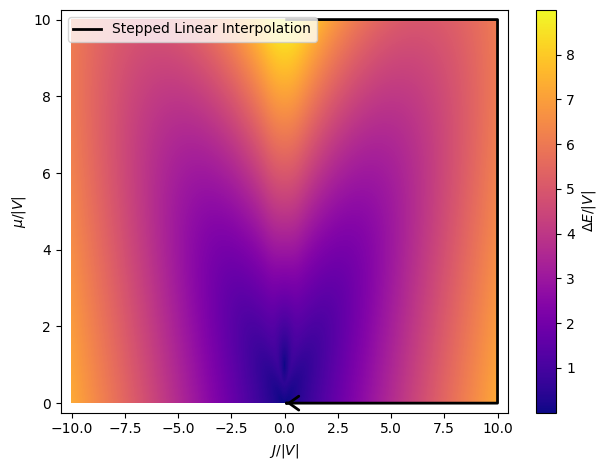

In [11]:
df = pd.read_csv("energy_gap_over_V_neg_V_resolution=1000.csv", index_col='J/V_ratios')
energy_gap_grid = df.to_numpy()

J_V_ratios = np.linspace(-10,10,1000)
mu_V_ratios = np.linspace(0,10,1000)
mu_V_ratio_grid, J_V_ratio_grid = np.meshgrid(mu_V_ratios, J_V_ratios)

plt.pcolormesh(J_V_ratio_grid, mu_V_ratio_grid, energy_gap_grid, shading = "auto", cmap = "plasma")
plt.colorbar(label="$\Delta E/ |V|$")

plt.plot(J_V_ratio_routine, mu_V_ratio_routine, "-k", label = "Stepped Linear Interpolation", lw = 2)

plt.annotate(
    '', 
    xy=(J_V_ratio_routine[-1], mu_V_ratio_routine[-1]),  # end point of the line
    xytext=(J_V_ratio_routine[-2], mu_V_ratio_routine[-2]),  # a point just before the end for direction
    arrowprops=dict(
        arrowstyle='->,head_width=0.5,head_length=0.7',  # adjust size as needed
        color='k', 
        lw = 2
    )
)

plt.xlabel("$J/|V|$")
plt.ylabel("$\mu/|V|$")
plt.legend(loc="upper left")
plt.xlim(-10.5,10.5)
plt.ylim(-0.25,10.25)
plt.tight_layout()
